In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\data.csv")
print(df)


                  date         price  bedrooms  bathrooms  sqft_living  \
0     02-05-2014 00:00  3.130000e+05         3       1.50         1340   
1     02-05-2014 00:00  2.384000e+06         5       2.50         3650   
2     02-05-2014 00:00  3.420000e+05         3       2.00         1930   
3     02-05-2014 00:00  4.200000e+05         3       2.25         2000   
4     02-05-2014 00:00  5.500000e+05         4       2.50         1940   
...                ...           ...       ...        ...          ...   
4595  09-07-2014 00:00  3.081667e+05         3       1.75         1510   
4596  09-07-2014 00:00  5.343333e+05         3       2.50         1460   
4597  09-07-2014 00:00  4.169042e+05         3       2.50         3010   
4598  10-07-2014 00:00  2.034000e+05         4       2.00         2090   
4599  10-07-2014 00:00  2.206000e+05         3       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0    

In [4]:
df.shape

(4600, 18)

In [5]:
x = df[['sqft_above','sqft_lot']]
print(x)

      sqft_above  sqft_lot
0           1340      7912
1           3370      9050
2           1930     11947
3           1000      8030
4           1140     10500
...          ...       ...
4595        1510      6360
4596        1460      7573
4597        3010      7014
4598        1070      6630
4599        1490      8102

[4600 rows x 2 columns]


In [6]:
y = df['price']
print(y)

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64


In [7]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_18480\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [10]:
x = df[['sqft_above','sqft_living','sqft_basement','bedrooms','bathrooms','view']]
print(x)

      sqft_above  sqft_living  sqft_basement  bedrooms  bathrooms  view
0           1340         1340              0         3       1.50     0
1           3370         3650            280         5       2.50     4
2           1930         1930              0         3       2.00     0
3           1000         2000           1000         3       2.25     0
4           1140         1940            800         4       2.50     0
...          ...          ...            ...       ...        ...   ...
4595        1510         1510              0         3       1.75     0
4596        1460         1460              0         3       2.50     0
4597        3010         3010              0         3       2.50     0
4598        1070         2090           1020         4       2.00     0
4599        1490         1490              0         3       2.50     0

[4600 rows x 6 columns]


In [11]:
y=df['price']
print(y)

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64


In [12]:
odel_lr = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
prediction = model_lr.predict(x_test)


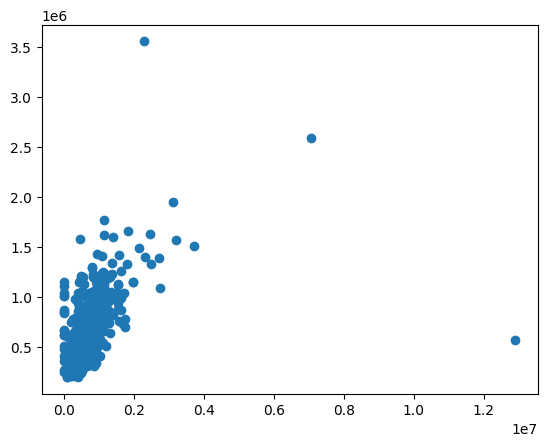

In [13]:
plt.scatter(y_test, prediction,)

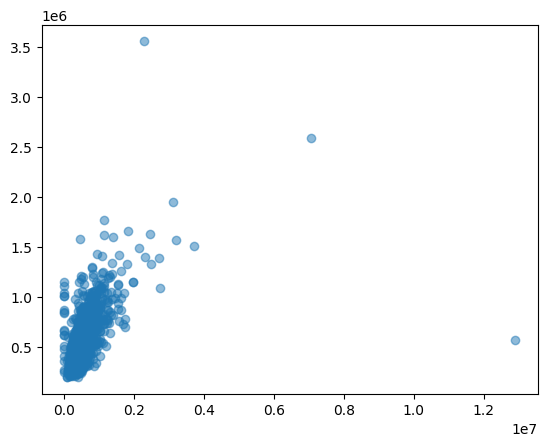

In [14]:
plt.scatter(y_test, prediction, alpha=0.5)

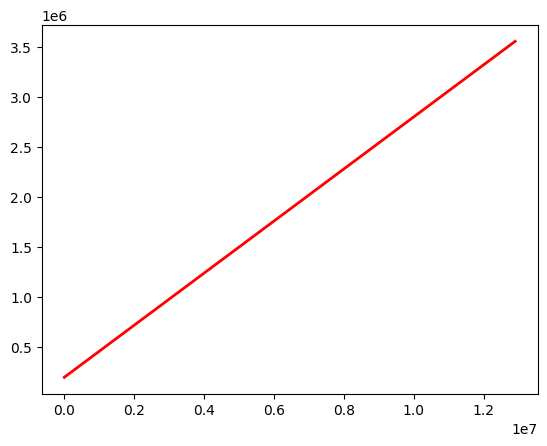

In [15]:
plt.plot([min(y_test), max(y_test)], [min(prediction), max(prediction)], color='red', linewidth=2)

In [16]:
mse = mean_squared_error(y_test, prediction)
print(mse)

185128061567.743


In [17]:
rmse = np.sqrt(mse)
print(rmse)

430265.10614706256


In [18]:
mae = mean_absolute_error(y_test, prediction)
print(mae)

176007.59817971787


In [19]:
r2 = r2_score(y_test, prediction)
print("R-squared (R2):", r2)

R-squared (R2): 0.2767063729850989


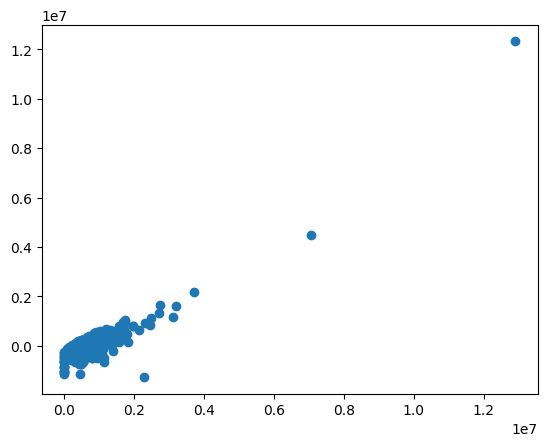

In [20]:
residuals = y_test - prediction
plt.scatter(y_test, residuals)

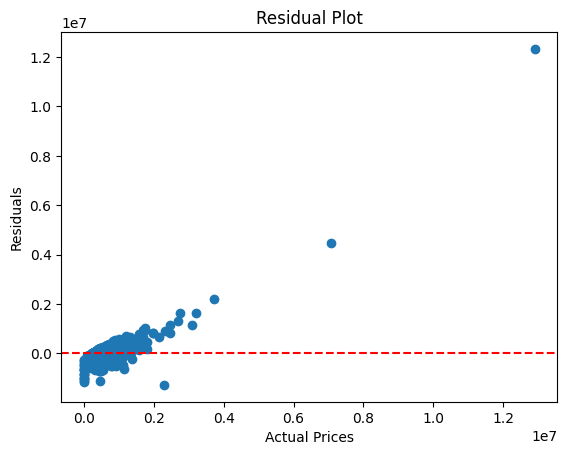

In [21]:
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()